
# <b>Tutorial 4: Advanced data analysis</b>



## Learning Objectives:

In this session we will learn: 
1. to calculate frequency of wet days
2. to calculate percentiles
3. how to calculate some useful climate extremes statistics

## Contents

1. [Frequency of wet days](#freq)
2. [Percentiles](#percent)
3. [Investigating extremes](#extremes)
4. [Exercises](#exercise)

<div class="alert alert-block alert-warning">
<b>Prerequisites</b> <br> 
- Basic programming skills in python<br>
- Familiarity with python libraries Iris, Numpy and Matplotlib<br>
- Basic understanding of climate data<br>
- Tutorial 1, 2 and 3
</div>

___

## 1. Frequency of wet days<a id='freq'></a>
### 1.1 Import libraries
Import the necessary libraries. Current datasets are in zarr format, we need zarr and xarray libraries to access the data

In [1]:
import numpy as np
import xarray as xr
import zarr
import iris
import os
from cssp_utils import zarr_reader
from iris.analysis import Aggregator
import dask
dask.config.set(scheduler=dask.get)
import dask.array as da
import iris.quickplot as qplt
import iris.plot as iplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from catnip.preparation import extract_rot_cube, add_bounds
from xarray_iris_coord_system import XarrayIrisCoordSystem as xics
xi = xics()
xr.set_options(display_style='text') # Work around for AML bug that won't display HTML output.

<div class="alert alert-block alert-warning">
<b>Prerequisites</b> <br> 
- Basic programming skills in python<br>
- Familiarity with python libraries Iris, Numpy and Matplotlib<br>
- Basic understanding of climate data<br>
- Tutorials 1, 2 and 3
</div>

___

### 1.2 Set up authentication for the Azure blob store

The data for this course is held online in an Azure Blob Storage Service. To access this we use a SAS (shared access signature).  You should have been given the credentials for this service before the course, but if not please ask your instructor. We use the getpass module here to avoid putting the token into the public domain. Run the cell below and in the box enter your SAS and press return. This will store the password in the variable SAS.

In [2]:
import getpass
# SAS WITHOUT leading '?'
SAS = getpass.getpass()

 ····················································································


We now use the Zarr library to connect to this storage. This is a little like opening a file on a local file system but works without downloading the data. This makes use of the Azure Blob Storage service. The zarr.ABStore method returns a zarr.storage.ABSStore object which we can now use to access the Zarr data in the same way we would use a local file. If you have a Zarr file on a local file system you could skip this step and instead just use the path to the Zarr data below when opening the dataset.

In [3]:
store = zarr.ABSStore(container='metoffice-20cr-ds', prefix='daily/', account_name="metdatasa", blob_service_kwargs={"sas_token":SAS})
type(store)

zarr.storage.ABSStore

### 1.3 Read daily data
A Dataset consists of coordinates and data variables. Let's use the xarray's **open_zarr()** method to read all our zarr data into a dataset object and display it's metadata

In [4]:
# use the open_zarr() method to read in the whole dataset metadata
dataset = xr.open_zarr(store)
# print out the metadata
dataset

<xarray.Dataset>
Dimensions:                                           (grid_latitude: 203, grid_latitude_1: 202, grid_longitude: 270, grid_longitude_1: 270, pressure: 14, time: 58430)
Coordinates:
  * grid_latitude                                     (grid_latitude) float32 ...
  * grid_latitude_1                                   (grid_latitude_1) float32 ...
  * grid_longitude                                    (grid_longitude) float32 ...
  * grid_longitude_1                                  (grid_longitude_1) float32 ...
  * pressure                                          (pressure) float32 10.0...
  * time                                              (time) datetime64[ns] 1...
Data variables:
    air_pressure_at_sea_level                         (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    air_temperature_at_pressure_mean                  (time, pressure, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 1, 203, 270), meta=np.ndarray>
    air_temperature_max                               (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    air_temperature_mean                              (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    air_temperature_min                               (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    atmosphere_convective_available_potential_energy  (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    cloud_area_fraction                               (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    geopotential_height                               (time, pressure, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 1, 203, 270), meta=np.ndarray>
    precipitation_flux                                (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    relative_humidity_at_pressure_mean                (time, pressure, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 1, 203, 270), meta=np.ndarray>
    relative_humidity_max                             (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    relative_humidity_mean                            (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    relative_humidity_min                             (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    specific_humidity                                 (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    surface_air_pressure                              (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    surface_downwelling_longwave_flux_in_air          (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air         (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    surface_temperature_max                           (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    surface_temperature_mean                          (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    surface_temperature_min                           (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(500, 203, 270), meta=np.ndarray>
    x_wind_at_pressure_mean                           (time, pressure, grid_latitude_1, grid_longitude_1) float32 dask.array<chunksize=(500, 1, 202, 27

Convert the dataset into an iris cubelist.

In [5]:
from xarray_iris_coord_system import XarrayIrisCoordSystem as xics
xi = xics()
# create an empty list to hold the iris cubes
cubelist = iris.cube.CubeList([])

# use the DataSet.apply() to convert the dataset to Iris Cublelist
dataset.apply(lambda da: cubelist.append(xi.to_iris(da)))

# print out the cubelist.
cubelist

[<iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of air_temperature / (K) (time: 58430; pressure: 14; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of air_temperature / (K) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of air_temperature / (K) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of air_temperature / (K) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of atmosphere_convective_available_potential_energy / (J kg-1) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of cloud_area_fraction / (unknown) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of geopotential_height / (m) (time: 58430; pressure: 14; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of precipitation_flux / (kg m-2 s-1) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of relative_humidity / (%) (time: 58430; pressure: 14; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of relative_humidity / (%) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of relative_humidity / (%) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of relative_humidity / (%) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of specific_humidity / (unknown) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of surface_air_pressure / (Pa) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of surface_downwelling_longwave_flux_in_air / (W m-2) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of surface_downwelling_shortwave_flux_in_air / (W m-2) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of surface_temperature / (K) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of surface_temperature / (K) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of surface_temperature / (K) (time: 58430; grid_latitude: 203; grid_longitude: 270)>,
<iris 'Cube' of x_wind / (m s-1) (time: 58430; pressure: 14; grid_latitude: 202; grid_longitude: 270)>,
<iris 'Cube' of x_wind / (m s-1) (time: 58430; grid_latitude: 202; grid_longitude: 270)>,
<iris 'Cube' of y_wind / (m s-1) (time: 58430; pressure: 14; grid_latitude: 202; grid_longitude: 270)>,
<iris 'Cube' of y_wind / (m s-1) (time: 58430; grid_latitude: 202; grid_longitude: 270)>]

---

<div class="alert alert-block alert-info">
    <b>Note:</b> The following <b>sections</b> demonstrate analysis of moderate extremes. The basis of climate extremes analysis is a common set of standard extreme climate indices, defined by the World Climate Research Programme <a href="https://www.wcrp-climate.org/etccdi">Expert Team on Climate Change Detection and Indices (ETCCDI)</a>
    
<br>There are 27 climate extremes indices, nicely summarised by the <a href="https://www.climdex.org/learn/indices/">Climdex</a> website.
</div>

### 1.4 Calculate number of wet days ($\mathrm{pr} \geq 1 mm \;day^{-1}$)

In this section we'll be looking at wet days, a threshold measure giving the count of days when $\mathrm{pr} \geq 1 mm \;day^{-1}$, and R95p, the 95th percentile of precipitation on wet days ($\mathrm{pr} \geq 1 mm \;day^{-1}$) in the 1851-1900 period over the Shanghai region.

In [ ]:
# Extract the 'precipitation_flux' cube
pflx = cubelist.extract_strict('precipitation_flux')
# To avoid warnings when collapsing coordinates and also when plotting, add bounds to all coordinates
pflx = add_bounds(pflx,['time', 'grid_latitude', 'grid_longitude'])
# convert units to mm/day (equivalent to 'kg m-2 day-1')
pflx.convert_units('kg m-2 day-1')

Applying the time and region constraint

In [ ]:
# define time constraint and extract 1851-1900 period
start_time = 1851
end_time = 1900

# define the time constraint
time_constraint = iris.Constraint(time=lambda cell: start_time <= cell.point.year <= end_time)

# laod the data into cubes applying the time constraint
pflx = pflx.extract(time_constraint)

# extract Shangai region and constain with time

# defining Shangai region coords
min_lat=29.0
max_lat=32.0
min_lon=118.0
max_lon=123.0

# extract data for the the Shanghai region using extract_rot_cube() function
pflx = extract_rot_cube(pflx, min_lat, min_lon, max_lat, max_lon)

In [ ]:
# now use the iris COUNT aggregator to count the number of days with > 1mm precip
wetdays = pflx.collapsed('time', iris.analysis.COUNT, function=lambda values: values > 1)
wetdays.rename('number of wet days (>=1mm/day)')

In [ ]:
# Find wet days as a percentage of total days
total_days = len(pflx.coord('time').points)
pcent_wetdays = (wetdays / total_days) * 100

# renaming the cube name and units
pcent_wetdays.rename('percentage of wet days (>=1mm/day)')
pcent_wetdays.units = '%'

Now, we can plot the number and percententage of wet days

In [ ]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Number of wet days (1851-1900)', fontsize=16)
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
qplt.pcolormesh(wetdays)
ax1.coastlines()
ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
qplt.pcolormesh(pcent_wetdays)
ax1.coastlines()
plt.show()

<div class="alert alert-block alert-success">
    <b>Task:</b><br><ul>
        <li> Calculate and visualise the percentage difference of wet days from past (1851-1880) to recent (1981-2010) 30 years period.
    </ul>
</div>

In [ ]:
# Write your code here ..

In [ ]:
# Write your code here ..

___

## 2. Percentiles<a id='percent'></a>

### 2.1 Calculating 95th percentile of precipitation

In this section we will calculate the extreme precipitation i.e. 95th percentile of rainfall on wet days over Shanghai region from 1981-2010. 

In [6]:
# Extract the 'precipitation_flux' cube
pflx = cubelist.extract_strict('precipitation_flux')

# change the units to kg m-2 d-1
pflx.convert_units('kg m-2 d-1')

In [7]:
# define time constraint and extract 1851-1900 period
start_time = 1981
end_time = 2010

# define the time constraint
cons = iris.Constraint(time=lambda cell: start_time <= cell.point.year <= end_time)

# laod the data into cubes applying the time constraint
pflx = pflx.extract(cons)

# extract Shangai region and constain with time

# defining Shangai region coords
min_lat=29.0
max_lat=32.0
min_lon=118.0
max_lon=123.0

# extract data for the the Shanghai region using extract_rot_cube() function
pflx = extract_rot_cube(pflx, min_lat, min_lon, max_lat, max_lon)

In [8]:
# make a copy of the cube, mask where daily rainfall < 1 so that only wet days
# are included in the calculation
pflx_wet = pflx.copy()
pflx_wet.data = np.ma.masked_less(pflx_wet.data, 1.0)

Now we can use the *iris.analysis.PERCENTILE* method to calculate the percentile.

In [9]:
pflx_pc95 = pflx_wet.collapsed('time', iris.analysis.PERCENTILE, percent=95.)
pflx_pc95.rename('R95p of daily rainfall')

/anaconda/envs/cssp37/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


/anaconda/envs/cssp37/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/anaconda/envs/cssp37/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


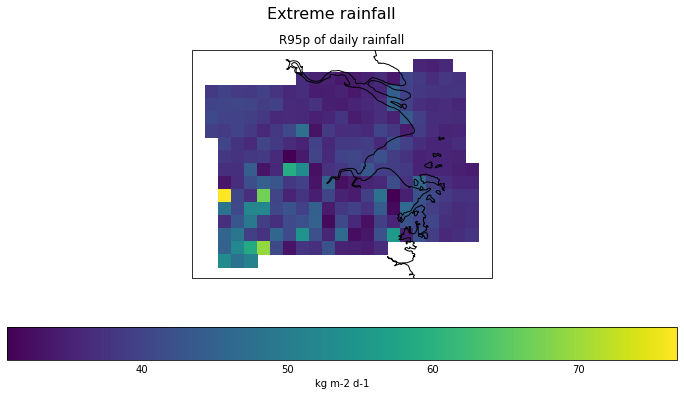

In [10]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Extreme rainfall', fontsize=16)
qplt.pcolormesh(pflx_pc95)
plt.gca().coastlines()
plt.show()

___

## 3. Investigate extremes<a id='extremes'></a>

### 3.1 Calculate the extreme index TX90P

Calculate the frequency of warm days in the present (extreme index TX90P), i.e. the number of days which exceed the 90th percentile temperatures in the baseline. Then calculate the numbers of days as a percentage.

In [ ]:
# first extract the air_temperature at 1.5m cubes from the cubelist
air_temp = cubelist.extract('air_temperature' & iris.AttributeConstraint(Height='1.5 m'))

# constraint for the maximum temperature 
max_temp_cons = iris.Constraint(cube_func=lambda c: (len(c.cell_methods) > 0) and 
                                (c.cell_methods[0].method == 'maximum'))

# define time constraint and extract 1851-1900 period (the baseline)
start_time = 1851
end_time = 1900

# define the time constraint
time_constraint = iris.Constraint(time=lambda cell: start_time <= cell.point.year <= end_time)

# applying the pressure, maximum temperature and time constraints getting a single cube
max_temp = air_temp.extract_strict(max_temp_cons & time_constraint)

# defining Shangai region coords
min_lat=29.0
max_lat=32.0
min_lon=118.0
max_lon=123.0

# extract data for the the Shanghai region using extract_rot_cube() function
max_temp = extract_rot_cube(max_temp, min_lat, min_lon, max_lat, max_lon)



In [ ]:
max_temp_pc90 = max_temp.collapsed('time', iris.analysis.PERCENTILE, percent=90.)
max_temp_pc90.rename('R90p of daily maximum temperature')

In [ ]:
# Now extract present day
# extract a single cube of maximum air_temperature at 1.5m cube from the cubelist
max_temp = cubelist.extract_strict('air_temperature' & iris.AttributeConstraint(Height='1.5 m') &
                           max_temp_cons)
# extract data for the the Shanghai region using extract_rot_cube() function
max_temp = extract_rot_cube(max_temp, min_lat, min_lon, max_lat, max_lon)


start_time = 1981
end_time = 2010

time_constraint = iris.Constraint(time=lambda cell: start_time <= cell.point.year <= end_time)
max_temp = max_temp.extract(time_constraint)


Now we need to calculate the number of warm days, we do so by counting all the data points that are greater than 90th percentile of the baseline period within the last 30 years. We can use numpy method **np.where** which return 1 where max_temp is greater then max_temp_pc90 and returns 0 otherise. 



In [ ]:
# make new cube to hold the counts
nwarmdays = max_temp_pc90.copy()

# Use broadcasting to identify all cells where daily temperatures in the future exceed the 95th percentile
temp_gt_pc90 = np.where(max_temp.data >= max_temp_pc90.data, 1, 0)

# using np.ma.sum to sum the number of warm days above the 90th percentile
nwarmdays.data = np.ma.sum(temp_gt_pc90, axis=0)

# the sum above removes the mask - reinstate it with 
nwarmdays.data.mask = max_temp_pc90.data.mask
nwarmdays.units = '1'


In [ ]:
qplt.pcolormesh(nwarmdays)
plt.gca().coastlines() 
plt.show()


Calculate percentage of warmest days by using **iris.analysis.maths**

In [ ]:
ndays = max_temp.shape[0]
# calculating percentage 
nwd_pcent = iris.analysis.maths.divide(iris.analysis.maths.multiply(nwarmdays, 100), ndays)
nwd_pcent.units="%"

Ploting the percentage of warm days

In [ ]:
qplt.pcolormesh(nwd_pcent)
plt.title('Percentage of warm days')
plt.gca().coastlines() 
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <b>Task:</b><br><ul>
        <li> Calculate and plot the past (1851-1880) and present (1981-2010) 90th percentile of maximum temperature and the difference between them.
    </ul>
</div>

In [ ]:
# Enter your code here ..

In [ ]:
# Enter your code here ..

___

## 4. Exercises<a id='exercise'></a>

In this exercise we will calculate the percentage of total precipitation from 1981-2010 which falls on very wet days (where a very wet day is one on which daily rainfall exceeds the 95th percentile of the baseline) over Shanghai region.

Further we also calculate the percentage of very wet days in the past (1851-1880) and see the difference by plotting the difference of heavy rainfall in the past and present.

### Exercise 1: calculate the percentage of total precipitation from 1981-2010 on very wet days (=> 95th Percentile)

In [ ]:
# write your code here ...

### Exercise 2: calculate the percentage of total precipitation from 1951-1880 on very wet days (=> 95th Percentile)

In [ ]:
# write your code here ...

### Exercise 3: Calculate the difference 

In [ ]:
# write your code here ...

### Exercise 4: Plot the percentages and difference 

In [ ]:
# write your code here ...

___

<div class="alert alert-block alert-success">
<b>Summary</b><br> 
    In this session we learned how:<br>
    <ul>
        <li>to calculate extreme values and percentages
        <li>to calcuate basic extreme value indices  
    </ul>

</div>
